# Inhalation and exhalation visualizer

**Note** <br>
If this is your first time running this code, you probably need to install the **neurokit2** library

Before proceeding, make sure your Python environment is activated (e.g. `venv`).  
Once the environment is active, install the required dependency by running:

```console
pip install neurokit2
```

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


breathing_path = "../datasets/Breathing/stefano_Still position_distance60_20251202-111950_brathing.csv"
fs = 10

# Import data and create mask

In [2]:
df = pd.read_csv(breathing_path)
resp_raw = df["force"].astype(float).ffill().values
signals, info = nk.rsp_process(resp_raw, sampling_rate=fs)

rsp = signals["RSP_Clean"]
phase = signals["RSP_Phase"].values

insp_mask = phase == 1.0
exp_mask  = phase == 0

# Plot graph

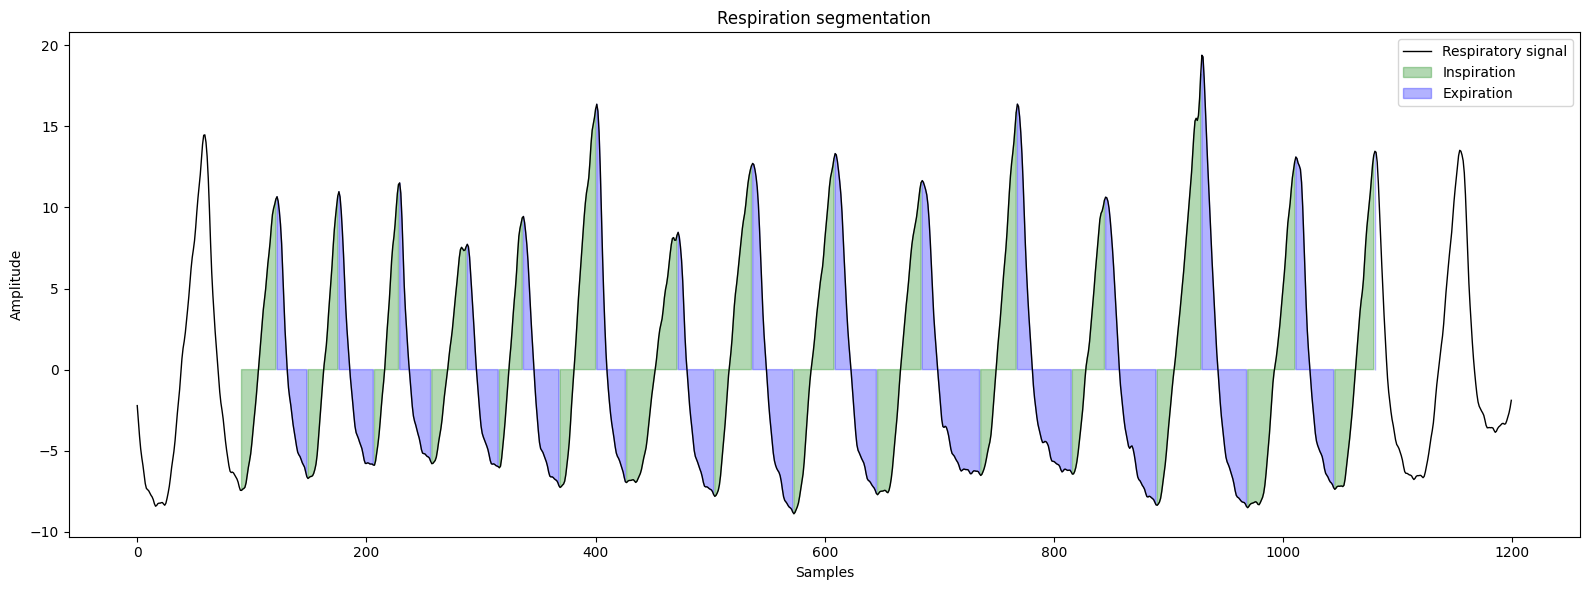

In [3]:
plt.figure(figsize=(16, 6))
plt.plot(rsp, color="black", linewidth=1, label="Respiratory signal")

plt.fill_between(
    range(len(rsp)), rsp, where=insp_mask,
    color="green", alpha=0.3, label="Inspiration"
)

plt.fill_between(
    range(len(rsp)), rsp, where=exp_mask,
    color="blue", alpha=0.3, label="Expiration"
)

plt.title("Respiration segmentation")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()
